In [1]:
import numpy as np
import pandas as pd

In [2]:
births = pd.read_csv('data/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format = '%Y%m%d')

births_by_date = births.pivot_table('births', [births.index.month, births.index.day])

births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

<ipython-input-2-639bcab2a259>:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]


In [3]:
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


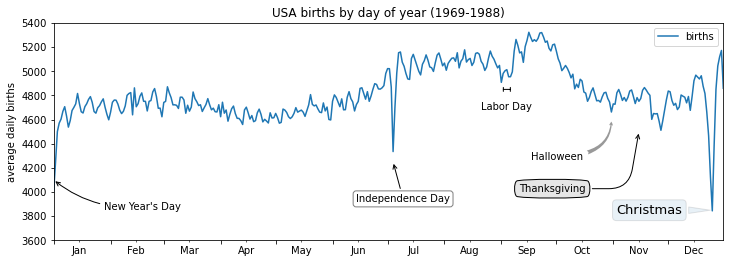

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12, 4))
births_by_date.plot(ax = ax)

ax.annotate("New Year's Day", xy = ('2012-1-1', 4100), xycoords = 'data', xytext = (50, -30), textcoords = 'offset points',
           arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3, rad = -0.2'))
ax.annotate('Independence Day', xy = ('2012-7-4', 4250), xycoords = 'data', 
            bbox = dict(boxstyle = 'round', fc = 'none', ec = 'gray'), xytext = (10, -40), textcoords = 'offset points',
           ha = 'center', arrowprops = dict(arrowstyle = '->'))
ax.annotate('Labor Day', xy = ('2012-9-4', 4850), xycoords = 'data', ha = 'center', xytext = (0, -20), 
            textcoords = 'offset points')
ax.annotate('', xy = ('2012-9-1', 4850), xytext = ('2012-9-7', 4850), xycoords = 'data', textcoords = 'data', 
           arrowprops = {'arrowstyle' : '|-|, widthA = 0.2, widthB = 0.2',})

ax.annotate('Halloween', xy = ('2012-10-31', 4600), xycoords = 'data', xytext = (-80, -40), textcoords = 'offset points',
           arrowprops = dict(arrowstyle = 'fancy', fc = '0.6', ec = 'none', connectionstyle = 'angle3, angleA = 0, angleB = -90'))
ax.annotate('Thanksgiving', xy = ('2012-11-15', 4500), xycoords = 'data', xytext = (-120, -60), textcoords = 'offset points', 
           bbox = dict(boxstyle = 'round4, pad = .5', fc = '0.9'), 
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'angle, angleA = 0, angleB = 80, rad = 20'))
ax.annotate('Christmas', xy = ('2012-12-25', 3850), xycoords = 'data', xytext = (-30, 0), textcoords = 'offset points',
           size = 13, ha = 'right', va = 'center', bbox = dict(boxstyle = 'round', alpha = 0.1),
           arrowprops = dict(arrowstyle = 'wedge, tail_width = 0.5', alpha = 0.1))

ax.set(title = 'USA births by day of year (1969-1988)', ylabel = 'average daily births', ylim = (3600, 5400))

ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday = 15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

In [5]:
%matplotlib inline

plt.style.use('seaborn-whitegrid')

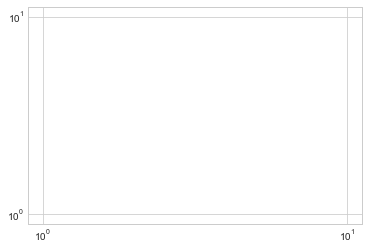

In [6]:
ax = plt.axes(xscale = 'log', yscale = 'log')

In [7]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [8]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

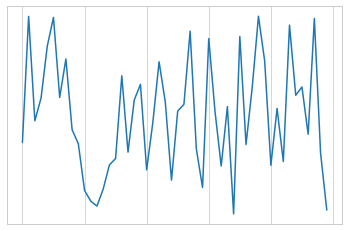

In [9]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

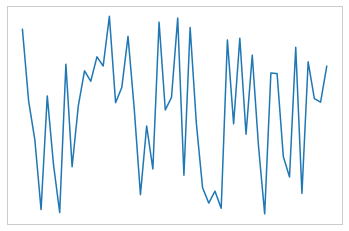

In [10]:
ax = plt.axes()
ax.plot(np.random.rand(50))

#ax.xaxis.set_major_formatter(plt.NullFormatter())
#ax.yaxis.set_major_formatter(plt.NullFormatter())

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_locator(plt.NullLocator())

In [11]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

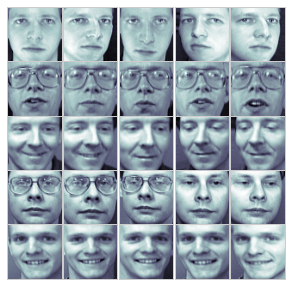

In [12]:
fig, ax = plt.subplots(5, 5, figsize = (5, 5))
fig.subplots_adjust(hspace = 0, wspace = 0)

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap = 'bone')

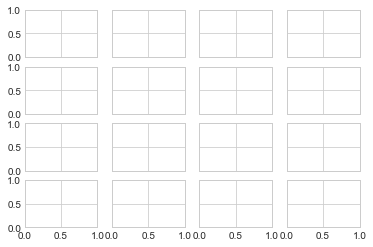

In [13]:
fig, ax = plt.subplots(4, 4, sharex = True, sharey = True)

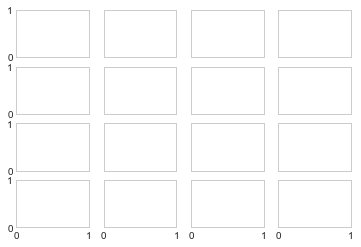

In [14]:
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(1))
    axi.yaxis.set_major_locator(plt.MaxNLocator(1))
    
fig

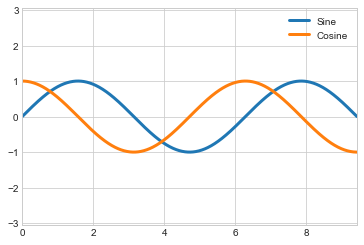

In [15]:
fig, ax = plt.subplots()

x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw = 3, label = 'Sine')
ax.plot(x, np.cos(x), lw = 3, label = 'Cosine')

ax.grid('True')
ax.legend(frameon = False)

ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

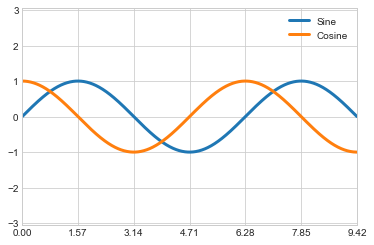

In [16]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))

fig

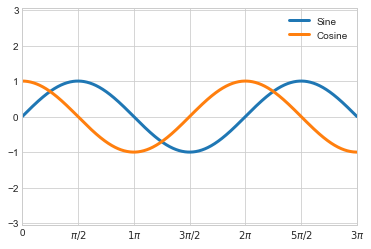

In [17]:
def format_func(value, tick_number):
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return '0'
    elif N == 1:
        return r'$\pi/2$'
    elif N % 2 > 0:
        return r'${0}\pi/2$'.format(N)
    else:
        return r'${0}\pi$'.format(N // 2)
    
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

fig

In [18]:
plt.style.use('classic')

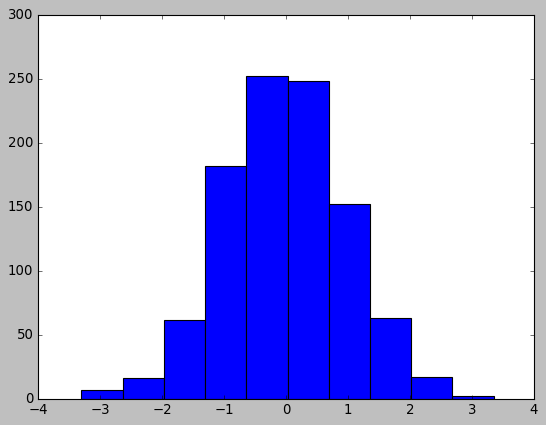

In [19]:
x = np.random.randn(1000)

plt.hist(x);

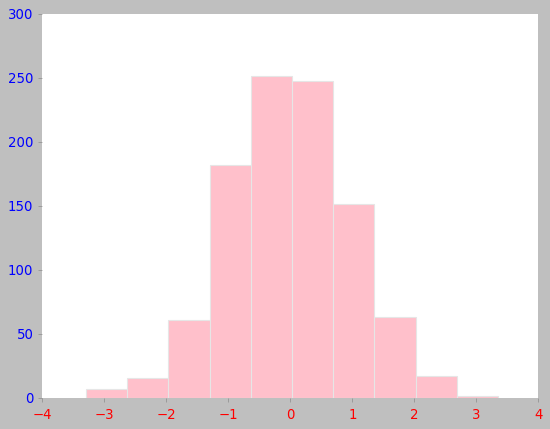

In [20]:
ax = plt.axes()
ax.set_axisbelow(True)

ax.grid(color = 'w', linestyle = 'solid')

for spine in ax.spines.values():
    spine.set_visible(False)
    
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

ax.tick_params(colors = 'gray', direction = 'out')
for tick in ax.get_xticklabels():
    tick.set_color('red')
for tick in ax.get_yticklabels():
    tick.set_color('blue')

ax.hist(x, edgecolor = '#E6E6E6', color = 'pink');

In [22]:
Ipython_default = plt.rcParams.copy()

In [38]:
from matplotlib import cycler

colors = cycler('color', ['#EE6666', '#3388BB', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB'])

plt.rc('axes', facecolor = '#EE6666', edgecolor = 'none', axisbelow = True, grid = True, prop_cycle = colors)
plt.rc('grid', color = 'w', linestyle = 'solid')

plt.rc('xtick', direction = 'out', color = 'gray')
plt.rc('ytick', direction = 'out', color = 'gray')

plt.rc('patch', edgecolor = '#EE6666')
plt.rc('lines', linewidth = 2)

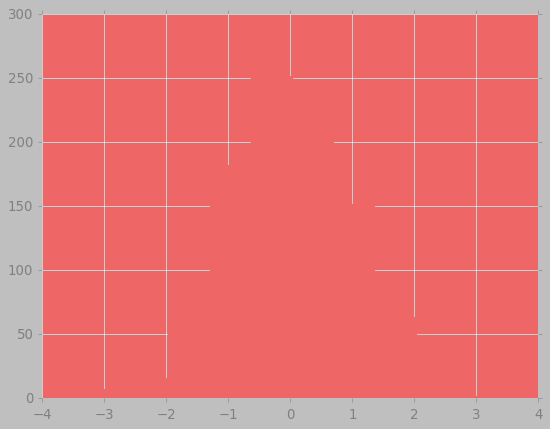

In [39]:
plt.hist(x);

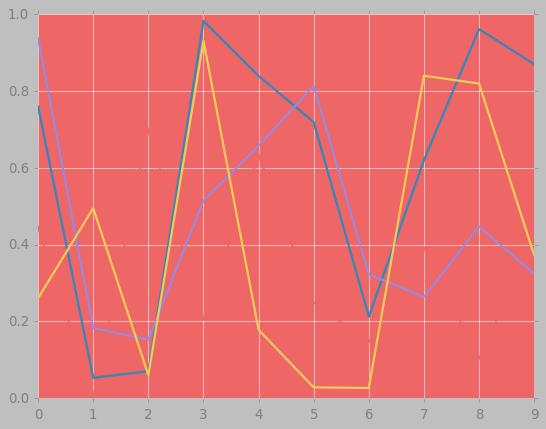

In [40]:
for i in range(4):
    plt.plot(np.random.rand(10))

In [41]:
plt.style.available[:5]

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background']

In [43]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize = (11, 4))
    ax[0].hist(np.random.randn(1000))
    
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc = 'lower left')

In [45]:
plt.rcParams.update(Ipython_default)

C:\Users\U\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Users\U\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Users\U\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Users\U\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Users\U\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in 

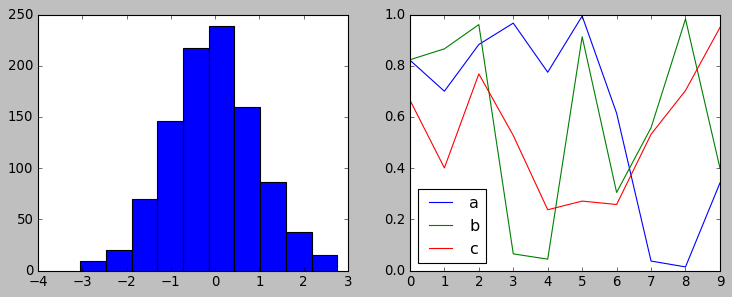

In [46]:
hist_and_lines()

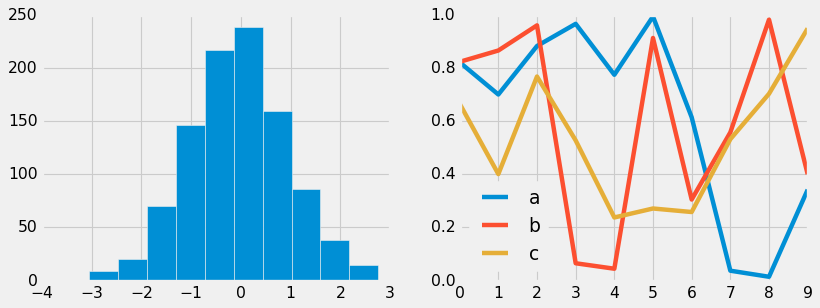

In [47]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

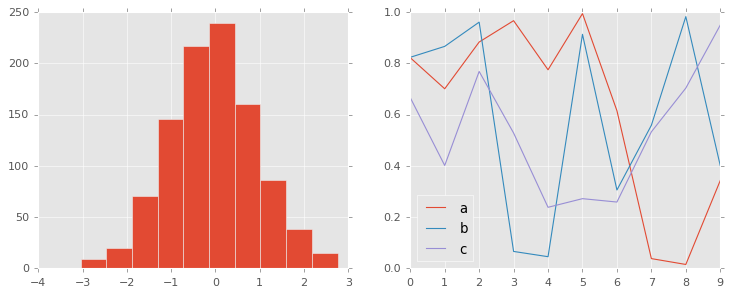

In [48]:
with plt.style.context('ggplot'):
    hist_and_lines()

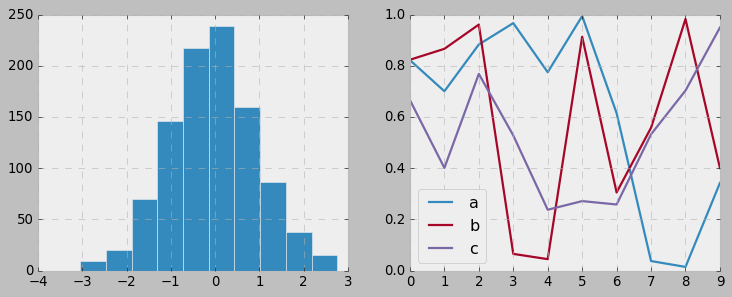

In [49]:
with plt.style.context('bmh'):
    hist_and_lines()

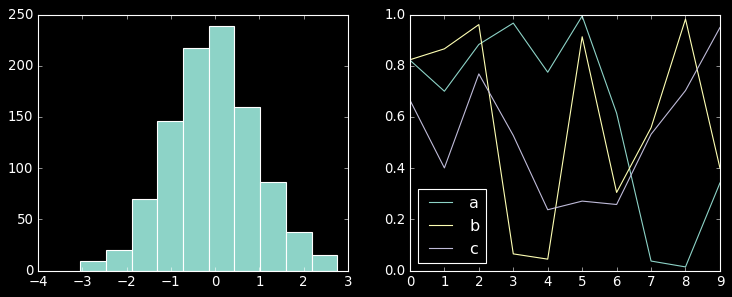

In [50]:
with plt.style.context('dark_background'):
    hist_and_lines()

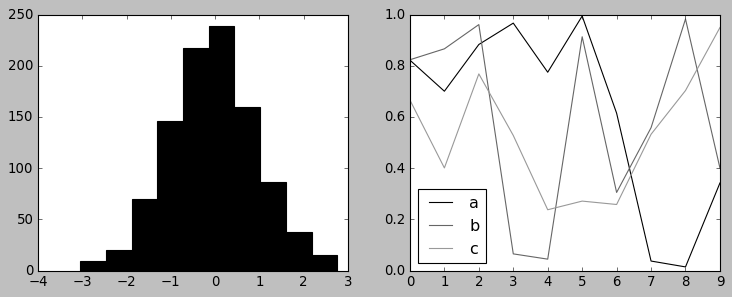

In [51]:
with plt.style.context('grayscale'):
    hist_and_lines()

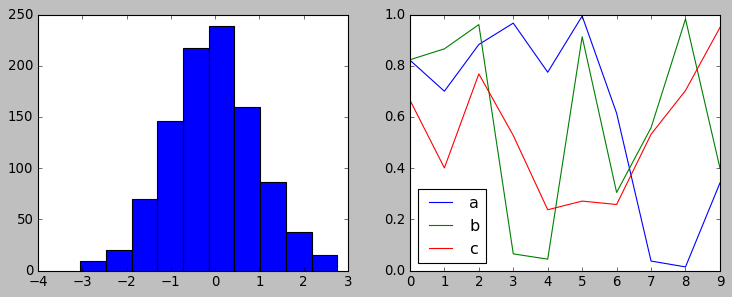

In [52]:
import seaborn
hist_and_lines()

In [53]:
from mpl_toolkits import mplot3d

In [54]:
%matplotlib inline

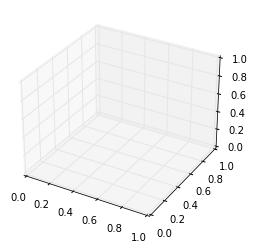

In [55]:
fig = plt.figure()
ax = plt.axes(projection = '3d')

In [56]:
%matplotlib notebook

<IPython.core.display.Javascript object>


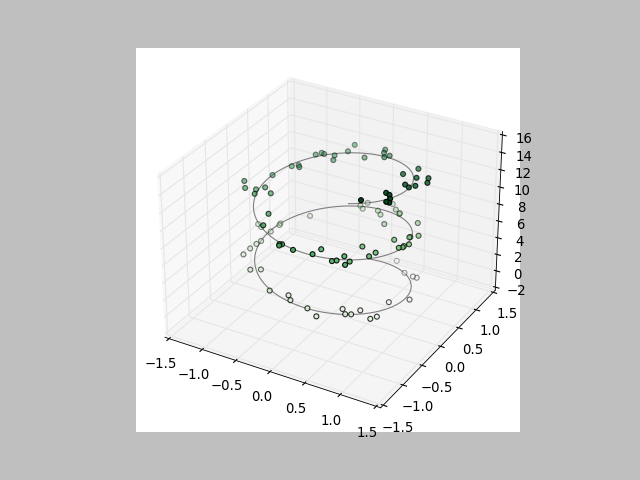

In [73]:
ax = plt.axes(projection = '3d')

zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c = zdata, cmap = 'Greens')

In [74]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

<IPython.core.display.Javascript object>


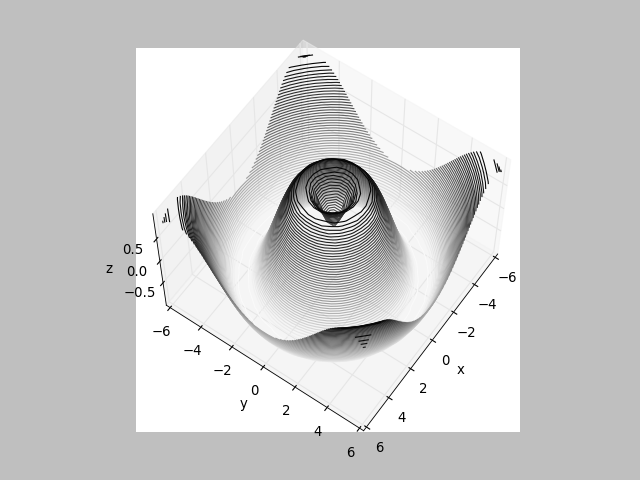

[Text(0.5, 0, 'x'), Text(0.5, 0, 'y'), Text(0.5, 0, 'z')]

In [75]:
fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.contour3D(X, Y, Z, 50, cmap = 'binary')

ax.set(xlabel = 'x', ylabel = 'y', zlabel = 'z')

<IPython.core.display.Javascript object>


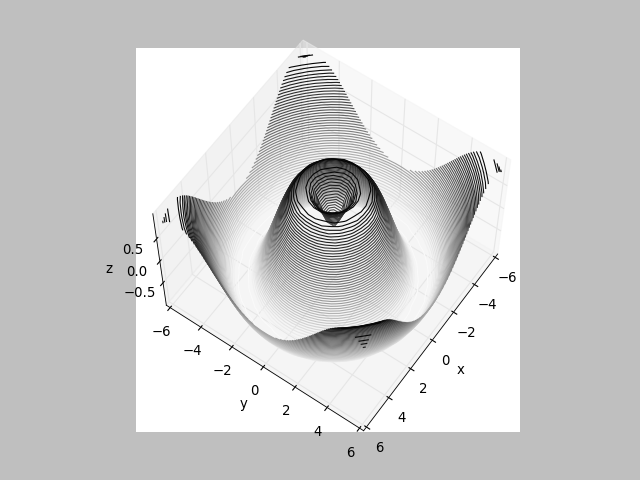

In [76]:
ax.view_init(60, 35)

fig

<IPython.core.display.Javascript object>


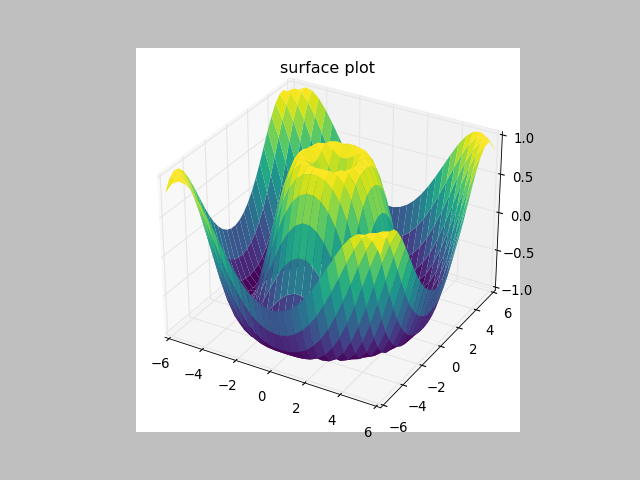

[Text(0.5, 0.92, 'wireframe')]

In [77]:
fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.plot_wireframe(X, Y, Z, color = 'black')
ax.set(title = 'wireframe')

In [78]:
ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
ax.set(title = 'surface plot');

<IPython.core.display.Javascript object>


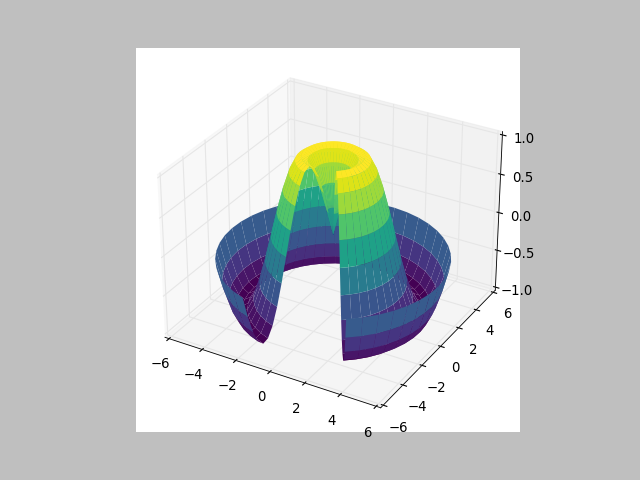

In [79]:
fig = plt.figure()
ax = plt.axes(projection = '3d')

r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none');